## Model Design and Evaluation

### Importing the libraries

In [11]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

### Getting the data

In [12]:
dataset = pd.read_csv('Cleaned_Data.csv')
dataset.head().T

,0,1,2,3,4
Borough,Manhattan,Manhattan,Bronx,Bronx,Bronx
Reporting Construction Type,Preservation,Preservation,Preservation,Preservation,Preservation
Extended Affordability Only,No,No,No,No,No
Prevailing Wage Status,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage
Extremely Low Income Units,127,0,0,1,0
Very Low Income Units,11,396,26,15,10
Low Income Units,12,0,3,5,11
Moderate Income Units,0,0,0,0,0
Middle Income Units,10,0,0,0,0
Other Income Units,1,0,1,0,1


### Summarizing numerical data

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Extremely Low Income Units,5631.0,5.874267,22.826681,0.0,0.0,0.0,0.0,429.0
Very Low Income Units,5631.0,10.794353,35.930379,0.0,0.0,0.0,4.0,396.0
Low Income Units,5631.0,13.583378,36.040974,0.0,0.0,1.0,9.0,536.0
Moderate Income Units,5631.0,2.216835,14.850434,0.0,0.0,0.0,0.0,454.0
Middle Income Units,5631.0,3.393713,18.989509,0.0,0.0,0.0,0.0,448.0
Other Income Units,5631.0,0.158409,0.375232,0.0,0.0,0.0,0.0,3.0
Studio Units,5631.0,5.334221,20.455883,0.0,0.0,0.0,1.0,569.0
1-BR Units,5631.0,12.738235,27.791447,0.0,0.0,2.0,10.0,312.0
2-BR Units,5631.0,12.377375,27.424507,0.0,0.0,2.0,10.0,305.0
3-BR Units,5631.0,4.619251,12.932875,0.0,0.0,0.0,3.0,193.0


In [14]:
dataset.isna().sum().sum()

5293

In [15]:
dataset.isnull().sum() * 100 / len(dataset)

Borough                         0.000000
Reporting Construction Type     0.000000
Extended Affordability Only     0.000000
Prevailing Wage Status          0.000000
Extremely Low Income Units      0.000000
Very Low Income Units           0.000000
Low Income Units                0.000000
Moderate Income Units           0.000000
Middle Income Units             0.000000
Other Income Units              0.000000
Studio Units                    0.000000
1-BR Units                      0.000000
2-BR Units                      0.000000
3-BR Units                      0.000000
4-BR Units                      0.000000
5-BR Units                      0.000000
6-BR+ Units                     0.000000
Unknown-BR Units                0.000000
Counted Rental Units            0.000000
Counted Homeownership Units     0.000000
income_cat                     93.997514
dtype: float64

### Observations :
- Almost all of the attributes are Non-NULL except for income_cat.
- income_cat has ~94% of NULL values.
- I felt imputer is not useful for 94% of missing values.
- Income_cat is dropped of higher missing values.

In [16]:
cleaned_data = dataset.drop(['income_cat'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Borough                      5631 non-null   object
 1   Reporting Construction Type  5631 non-null   object
 2   Extended Affordability Only  5631 non-null   object
 3   Prevailing Wage Status       5631 non-null   object
 4   Extremely Low Income Units   5631 non-null   int64 
 5   Very Low Income Units        5631 non-null   int64 
 6   Low Income Units             5631 non-null   int64 
 7   Moderate Income Units        5631 non-null   int64 
 8   Middle Income Units          5631 non-null   int64 
 9   Other Income Units           5631 non-null   int64 
 10  Studio Units                 5631 non-null   int64 
 11  1-BR Units                   5631 non-null   int64 
 12  2-BR Units                   5631 non-null   int64 
 13  3-BR Units                   5631

### Locking at correlation predicting variable

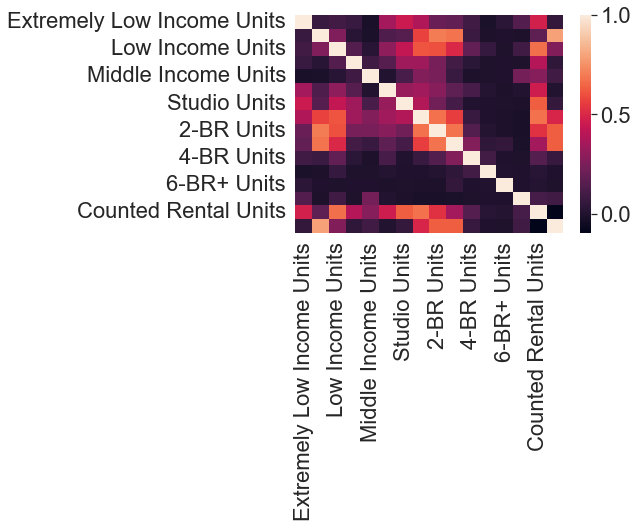

In [17]:
import seaborn as sns

sns.heatmap(cleaned_data.corr())
plt.show()


### Observations :
- There are a lot of uncorrelated features.
- Multicolinearity is less because of less related features.
- I will be using principal components and hyperparameters to extract these features.


<AxesSubplot:>

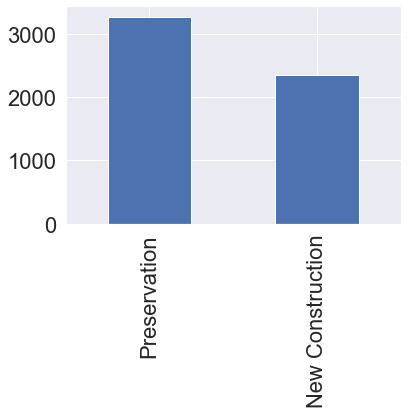

In [18]:
cleaned_data['Reporting Construction Type'].value_counts().plot(kind='bar')

### Observations :
- The target variable column(Reporting COnstruction Type) hss 2 categories - Preservation and New Construction.

### Problem Statement :
To build a machine learning model that predicts the Reporting COnstruction Type of houses for a "Borough". This data has metrics like various income units and bed room units( 1-BR, 2-BR, 3_BR etc.) 


Is it supervised, unsupervised or reinforcement learning ? Is it a classification task, a regression task or something different ? Our problem is clearly a supervised learning task, because I have labeled input data. It is also clearly a classification task since because I have to predict a categorical value.

 ### Importing the libraries

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Trimming the dataset

In [21]:
dataset_trim =cleaned_data.loc[cleaned_data['Reporting Construction Type'].isin(cleaned_data['Reporting Construction Type'].value_counts().index[cleaned_data['Reporting Construction Type'].value_counts() > 200])]


In [22]:
dataset_trim = dataset_trim.reset_index(drop=True)

### Splitting the dataset

In [70]:
from sklearn.model_selection import train_test_split
features = [x for x in cleaned_data.columns if x != 'Reporting Construction Type']
target= 'Reporting Construction Type'

y = cleaned_data[target]
x = cleaned_data[features]

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                          test_size=0.2,
                                                          random_state = 123)
print(f'Target: {targetCol}')
print('Features:')
print(*featureCols, sep='\n')
print('\n')
print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Target: Reporting Construction Type
Features:
Borough
Extended Affordability Only
Prevailing Wage Status
Extremely Low Income Units
Very Low Income Units
Low Income Units
Moderate Income Units
Middle Income Units
Other Income Units
Studio Units
1-BR Units
2-BR Units
3-BR Units
4-BR Units
5-BR Units
6-BR+ Units
Unknown-BR Units
Counted Rental Units
Counted Homeownership Units


Training examples: 4,504
Test examples: 1,127


In [71]:
categoricalFeatures=['Borough','Extended Affordability Only']
numericalFeatures = ['Extremely Low Income Units','Very Low Income Units','Low Income Units','Moderate Income Units','Middle Income Units',
              'Other Income Units','Studio Units','1-BR Units','2-BR Units','3-BR Units','4-BR Units','5-BR Units','6-BR+ Units',
              'Unknown-BR Units','Counted Rental Units','Counted Homeownership Units']


In [111]:
X_train.T

,3195,5404,5164,1770,2398,4726,3400,1179,2701,3673,...,4169,4143,96,1593,5243,5218,4060,1346,3454,3582
Borough,Manhattan,Brooklyn,Queens,Bronx,Manhattan,Bronx,Brooklyn,Bronx,Brooklyn,Queens,...,Bronx,Manhattan,Brooklyn,Brooklyn,Queens,Staten Island,Brooklyn,Bronx,Brooklyn,Staten Island
Extended Affordability Only,No,No,No,Yes,No,No,No,No,No,No,...,No,No,No,No,No,No,Yes,No,No,No
Prevailing Wage Status,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,...,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage,Non Prevailing Wage
Extremely Low Income Units,0,0,0,0,13,17,0,0,0,0,...,0,0,63,1,0,0,0,0,0,0
Very Low Income Units,7,2,0,0,2,0,0,108,0,0,...,0,0,0,5,0,0,36,1,0,0
Low Income Units,9,1,0,3,1,0,73,67,0,6,...,0,13,1,3,0,58,0,3,7,0
Moderate Income Units,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
Middle Income Units,1,0,343,0,0,0,0,0,7,0,...,0,0,0,0,1,0,0,0,0,0
Other Income Units,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Studio Units,10,0,0,0,0,5,22,0,1,3,...,0,0,30,0,0,41,0,0,0,0


### Creating a pipeline

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numericalFeatures),
                                                      ('create_dummies', cat_pipeline, categoricalFeatures)])
print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Extremely Low Income Units',
                                  'Very Low Income Units', 'Low Income Units',
                                  'Moderate Income Units',
                                  'Middle Income Units', 'Other Income Units',
                                  'Studio Units', '1-BR Units', '2-BR Units',
                                  '3-BR Units', '4-BR Units', '5-BR Units',
                                  '6-BR+ Units', 'Unknown-BR Units',
                                  'Counted Rental Units',
                                  'Counted Homeownership Units']),
                             

### Modeling

In [126]:
clf1 = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()

pipe1 = Pipeline([('data_processing', processing_pipeline),('logreg', clf1)])
pipe2 = Pipeline([('data_processing', processing_pipeline),('tree', clf2)])
pipe3 = Pipeline([('data_processing', processing_pipeline),('rf', clf3)])

### Logistic Regression

In [143]:
param_grid_lr= [
  {'logreg__class_weight': ['balanced'], 'logreg__C':[ 0.005, 0.01,0.03, 0.05,0.75, 0.1, 0.5 ],'logreg__solver':['saga','sag']}
 ]
gcv_lr = GridSearchCV(estimator=pipe1, param_grid=param_grid_lr, scoring=['accuracy'], cv=5, refit='accuracy',verbose=5)
gcv_lr = gcv_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.726) total time=   0.1s
[CV 2/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.721) total time=   0.1s
[CV 3/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.720) total time=   0.1s
[CV 4/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.715) total time=   0.1s
[CV 5/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=saga; accuracy: (test=0.749) total time=   0.1s
[CV 1/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=sag; accuracy: (test=0.726) total time=   0.0s
[CV 2/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solver=sag; accuracy: (test=0.721) total time=   0.0s
[CV 3/5] END logreg__C=0.005, logreg__class_weight=balanced, logreg__solv

In [128]:
gcv_lr.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Extremely Low Income Units',
                                                   'Very Low Income Units',
                                                   'Low Income Units',
                                                   'Moderate Income Units',
                                                   'Middle Income Units',
                                                   'Other Income Units',
                                                   'Studio Units', '1-BR Units',
     

### Making predictions and estimating performance on the test set. 

In [129]:
ypred_lr = gcv_lr.predict(X_test)
print(classification_report(y_test, ypred_lr))

                  precision    recall  f1-score   support

New Construction       0.61      0.91      0.73       468
    Preservation       0.90      0.59      0.72       659

        accuracy                           0.72      1127
       macro avg       0.76      0.75      0.72      1127
    weighted avg       0.78      0.72      0.72      1127



In [130]:
confusion_matrix(y_test, ypred_lr)

array([[427,  41],
       [269, 390]])

### ROC curve

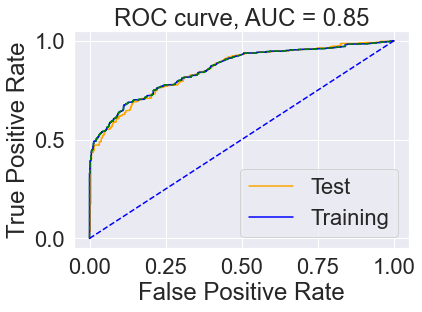

In [137]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_testprobability = gcv_lr.predict_proba(X_test)
y_trainprobability = gcv_lr.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob)
    return fpr, tpr
y_test_roc = y_test.map({'New Construction': 0, 'Preservation': 1}).astype(int)
y_train_roc = y_train.map({'New Construction': 0, 'Preservation': 1}).astype(int)
fpr_test, tpr_test = roc(y_test_roc, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train_roc, y_trainprobability[:,1])
auc = roc_auc_score(y_test_roc, y_testprobability[:,1], multi_class = 'ovr')
plt.plot(fpr_test, tpr_test,'orange')
plt.plot(fpr_train, tpr_train,'blue')
plt.plot(fpr_train, tpr_train, color = 'green', linestyle = 'dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.show()

### Observations :
- macro average when we used Logistic Regression to classify contributing factor is 0.76 
- Precision for new construction is 61% 
- precision for Preservation is 0.90

### Decision Tree

In [149]:
param_grid_tree = [
  {'tree__max_depth': [10, 25, 50],
   'tree__min_samples_split':[10, 25, 50, 100],
   'tree__min_samples_leaf': [50,100],
   'tree__class_weight':['balanced']
  }
 ]

gcv_tree = GridSearchCV(estimator=pipe2, param_grid=param_grid_tree, scoring='accuracy', refit=True, verbose=10)
gcv_tree = gcv_tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10
[CV 1/5; 1/24] END tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10;, score=0.858 total time=   0.0s
[CV 2/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10
[CV 2/5; 1/24] END tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10;, score=0.857 total time=   0.0s
[CV 3/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10
[CV 3/5; 1/24] END tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree__min_samples_split=10;, score=0.850 total time=   0.0s
[CV 4/5; 1/24] START tree__class_weight=balanced, tree__max_depth=10, tree__min_samples_leaf=50, tree

In [150]:
gcv_tree.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Extremely Low Income Units',
                                                   'Very Low Income Units',
                                                   'Low Income Units',
                                                   'Moderate Income Units',
                                                   'Middle Income Units',
                                                   'Other Income Units',
                                                   'Studio Units', '1-BR Units',
     

In [151]:
ypred_tree = gcv_tree.predict(X_test)
print(classification_report(y_test, ypred_tree, digits=3))

                  precision    recall  f1-score   support

New Construction      0.792     0.904     0.844       468
    Preservation      0.924     0.832     0.875       659

        accuracy                          0.862      1127
       macro avg      0.858     0.868     0.860      1127
    weighted avg      0.869     0.862     0.862      1127



In [153]:
decision_model.classes_

array(['New Construction', 'Preservation'], dtype=object)

In [156]:
confusion_matrix(y_test, ypred_tree)

array([[423,  45],
       [111, 548]])

### ROC curve

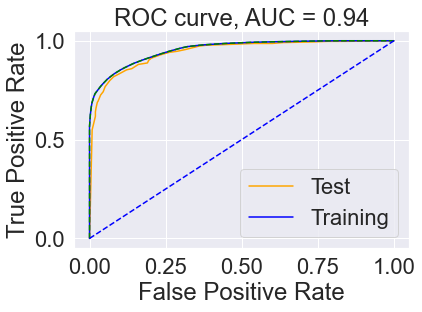

In [152]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_testprobability = gcv_tree.predict_proba(X_test)
y_trainprobability = gcv_tree.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob)
    return fpr, tpr
y_test_roc = y_test.map({'New Construction': 0, 'Preservation': 1}).astype(int)
y_train_roc = y_train.map({'New Construction': 0, 'Preservation': 1}).astype(int)
fpr_test, tpr_test = roc(y_test_roc, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train_roc, y_trainprobability[:,1])
auc = roc_auc_score(y_test_roc, y_testprobability[:,1], multi_class = 'ovr')
plt.plot(fpr_test, tpr_test,'orange')
plt.plot(fpr_train, tpr_train,'blue')
plt.plot(fpr_train, tpr_train, color = 'green', linestyle = 'dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.show()

### Observations

### Observations :
- macro average when we used Logistic Regression to classify contributing factor is 0.85
- Precision for new construction is 79% 
- precision for Preservation is 92%

### Random Forest

In [154]:
random_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

random_results = GridSearchCV(estimator=random_pipeline, param_grid=param_grid, scoring='recall', refit=True)
random_results = random_results.fit(X_train, y_train)
random_yhat = random_results.predict(X_test)
random_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Extremely Low Income Units',
                                                   'Very Low Income Units',
                                                   'Low Income Units',
                                                   'Moderate Income Units',
                                                   'Middle Income Units',
                                                   'Other Income Units',
                                                   'Studio Units', '1-BR Units',
     

In [155]:
y_testp = random_results.predict(X_test)
y_testp_rf = random_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))


                  precision    recall  f1-score   support

New Construction       0.80      0.84      0.82       468
    Preservation       0.88      0.85      0.86       659

        accuracy                           0.84      1127
       macro avg       0.84      0.84      0.84      1127
    weighted avg       0.85      0.84      0.84      1127



### ROC curve

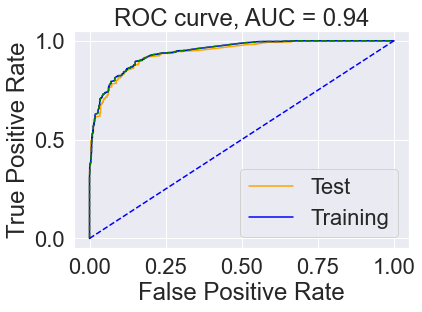

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_testprobability = rf_results.predict_proba(X_test)
y_trainprobability =rf_results.predict_proba(X_train)

def roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob)
    return fpr, tpr
y_test_roc = y_test.map({'New Construction': 0, 'Preservation': 1}).astype(int)
y_train_roc = y_train.map({'New Construction': 0, 'Preservation': 1}).astype(int)
fpr_test, tpr_test = roc(y_test_roc, y_testprobability[:,1])
fpr_train, tpr_train = roc(y_train_roc, y_trainprobability[:,1])
auc = roc_auc_score(y_test_roc, y_testprobability[:,1], multi_class = 'ovr')
plt.plot(fpr_test, tpr_test,'orange')
plt.plot(fpr_train, tpr_train,'blue')
plt.plot(fpr_train, tpr_train, color='green', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.show()

### Observations :
- macro average when we used Logistic Regression to classify contributing factor is 0.85
- Precision for new construction is 79% 
- precision for Preservation is 92%

### Conclusion :
The ultimate model would be a decision tree or a random forest. In comparison to other methods like Logistic Regression, both of these models accurately identify the less frequently occurring classes.